In [474]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from plotly.subplots import make_subplots
sns.set_style("whitegrid")
import statsmodels.api as sm

In [475]:
data = pd.read_csv(r"C:\Users\joao\Desktop\modelos\Stack Overflow Annual Developer\survey_results_public.csv")

# Resumo

Este trabalho tem como objetivo investigar o salário anual dos programadores nos Estados Unidos que trabalham em período integral. A pesquisa visa descobrir se certas variáveis contribuem para o aumento ou redução do salário em comparação com um homem branco americano comum. Para isso, foram consideradas variáveis de controle, como anos de experiência e nível de educação. Para as variáveis sociais, foram incluídos gênero, identidade de gênero (se a pessoa é trans ou não), orientação sexual, entre outros.

Os resultados revelaram que, em média, as mulheres recebem até 15.060 dólares anuais a menos que os homens. Além disso, verificou-se que os asiáticos têm um salário anual 51.830 dólares maior do que um americano branco típico. Também foi observado que pessoas LGBTs ou trans não têm um salário inferior ao de pessoas heterossexuais ou não trans.

Este trabalho é uma investigação neutra, livre de influências ideológicas, e os resultados foram obtidos de forma imparcial.

# Dados

Os dados foram retirados do site Kaggle e correspondem à pesquisa "Stack Overflow Annual Developer Survey 2022", focada em programadores e desenvolvedores.

# Varíaveis usadas

ramo_principal: Qual das seguintes opções melhor descreve você hoje?

emprego: Qual das seguintes opções melhor descreve o seu status de emprego atual?

trabalho_remoto: "Qual melhor descreve a sua situação de trabalho atual?"

nível_de_educação: "Qual das seguintes opções melhor descreve o nível mais alto de educação formal que você completou?"

aprender_a_programar: Como você aprendeu a programar?"

anos_de_exp_prof: "EXCLUINDO a educação, quantos anos você programou profissionalmente (como parte do seu trabalho)?"

tipo_de_desenvolvedor: "Qual das seguintes opções descreve o seu emprego atual?"

pais: "Onde você mora?"

total_de_remuneração: "Qual é a sua compensação total atual (salário, bônus e benefícios, antes de impostos e deduções)?"

idade

gênero

transgênero

sexualidade

etnia


# Escolha das variáveis

In [476]:
data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [477]:
data = data[['MainBranch' , 'Employment' , 'RemoteWork' , 'EdLevel' , 'LearnCode' , 'YearsCodePro' , 'DevType' , 'Country' , 'CompTotal' , 'Age' ,'Gender' , 'Trans' , 'Sexuality' , 'Ethnicity']]

In [478]:
colunas = ['ramo_principal', 'emprego', 'trabalho_remoto', 'nível_de_educação', 'aprender_a_programar', 'anos_de_exp_prof', 'tipo_de_desenvolvedor', 'pais', 'total_de_remuneração', 'idade', 'gênero', 'transgênero', 'sexualidade', 'etnia']

In [479]:
data.columns = colunas

Para fins de síntese, tentarei utilizar o mínimo possível de variáveis dummy. Vou detalhar o que fazer com cada variável:

    
   ramo_principal: Usarei apenas os desenvolvedores por profissão para tornar a amostra mais homogênea.
    
   emprego: Separarei entre empregados com carga horária completa.
   
   trabalho_remoto: Deixarei como está, pois possui apenas 3 valores: presencial, remoto e híbrido.
   
   nível_de_educação: Deixarei bacharelado, mestrado e agruparei o restante como "outros".
   
   aprender_a_programar: Separarei entre aqueles que aprenderam a programar por meio de educação formal (escola, universidade) e o restante como "outros".
   
   anos de experiência: Manterei como está, apenas substituindo a variável "menos de 1 ano" por zero e "mais de 50 anos" por 50, para torná-la em números inteiros.
   
   país: Usarei apenas as amostras dos Estados Unidos, já que não foi especificado se a remuneração está em paridade de poder de compra semelhante.
   
   total_de_remuneração: Removerei os valores ausentes ou iguais a zero, pois o interesse é saber como as variáveis explicativas afetam o salário das pessoas empregadas.
   
   idade: Farei uma média dos intervalos, como por exemplo "entre 29-34 anos", e mudarei para números inteiros.
   
   gênero: Separarei entre homens, mulheres e outros para tentar capturar qualquer tipo de discriminação por não se enquadrar nos gêneros convencionais.
   
   transgênero: Separarei entre não trans, trans e preferência em não informar.
   
   sexualidade: Também separarei entre hetero e não hetero para tentar capturar qualquer tipo de discriminação de salário contra pessoas LGBTs.
   
   etnia: Separarei em europeu, branco europeu, branco, indiano, asiático, latino ou hispânico, sul-americano, Oriente Médio, branco americano e outros.

In [480]:
data = data[data['total_de_remuneração'] > 0]

In [481]:
data = data[data['ramo_principal'] == data['ramo_principal'].value_counts().index[0]]

In [482]:
emprego = data['emprego'].str.contains('Employed')

In [483]:
emprego1 = np.where(~(emprego.isnull()) , emprego, False)

In [484]:
data = data[emprego1]

In [485]:
data = data[data['emprego'].str.contains('full-time')]

In [486]:
trabalho_redic = {}
for i , z in zip(data['trabalho_remoto'].value_counts().index , ['totalmente remoto' , 'hibrido', 'totalmente pessoal']):
    trabalho_redic[i] = z

In [487]:
data['trabalho_remoto'] = data['trabalho_remoto'].map(trabalho_redic)

In [488]:
def func_sub_ed(x):
    if x == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":
        return 'Bacharel'
    if x == "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":
        return 'Mestre'
    else:
        return 'outros'

In [489]:
data['nível_de_educação'] = data['nível_de_educação'].apply(func_sub_ed)

In [490]:
data['aprender_a_programar'] = np.where(data['aprender_a_programar'].str.contains('School'), 'Escola' , 'outros')

In [491]:
data['anos_de_exp_prof'] = data['anos_de_exp_prof'].replace(['Less than 1 year' , 'More than 50 years'] , [0,50])

In [492]:
mask_tipo_den_ = np.logical_or(data['tipo_de_desenvolvedor'].str.contains('Data scientist') , data['tipo_de_desenvolvedor'].str.contains('machine learning'))

In [493]:
data['tipo_de_desenvolvedor'] = np.where(mask_tipo_den_ , 'Data Science ou machine learning' , 'outros')

In [494]:
data['idade'] = data['idade'].replace(data['idade'].value_counts().index , [(34+25)/2 , (35+44)/2 , (18+24)/2, (45+54)/2, (55+64)/2, 65, 40, 18])

In [495]:
data['gênero'] = data['gênero'].apply(lambda x: x if x in ['Man' , 'Woman'] else 'Outros')

In [496]:
data['gênero'] = data['gênero'].replace(['Man' , 'Woman'] , ['Homem' , 'Mulher'])

In [497]:
data['transgênero'] = data['transgênero'].replace(data['transgênero'].value_counts().index, ['não' , 'sim' , 'prefere não dizer' , 'prefere não dizer'])

In [498]:
data['sexualidade'] = data['sexualidade'].apply(lambda x: x if x in ['Straight / Heterosexual'] else 'lgbt')

In [499]:
data['sexualidade'] = data['sexualidade'].replace('Straight / Heterosexual' , 'heterosexual')

In [500]:
data['etnia'] = data['etnia'].apply(lambda x: x if x in indexetnia else 'outros')

In [501]:
data['etnia'] = data['etnia'].replace(indexetnia , ['branco' , 'europeu' , 'branco europeu' , 'indiano' , 'asiatico' , 'latino ou hispanico' , 'oriente médio' , 'branco americano' , 'sul americano'])

In [502]:
data = data.dropna(axis=0)

In [503]:
data = data.iloc[:,2:]

In [504]:
data = data[data['pais'] == 'United States of America']

In [505]:
data = data.drop('pais' , axis=1)

In [506]:
data

,trabalho_remoto,nível_de_educação,aprender_a_programar,anos_de_exp_prof,tipo_de_desenvolvedor,total_de_remuneração,idade,gênero,transgênero,sexualidade,etnia
12,hibrido,Bacharel,Escola,5,outros,65000.0,29.5,Homem,não,heterosexual,branco
14,totalmente remoto,Mestre,Escola,5,outros,110000.0,29.5,Homem,não,heterosexual,branco
26,hibrido,Bacharel,Escola,5,outros,106960.0,29.5,Homem,não,heterosexual,branco americano
28,hibrido,Mestre,Escola,14,outros,130000.0,39.5,Homem,não,heterosexual,outros
31,totalmente remoto,Bacharel,outros,21,outros,102000.0,59.5,Homem,não,heterosexual,oriente médio
...,...,...,...,...,...,...,...,...,...,...,...
73222,totalmente remoto,Bacharel,Escola,11,outros,300000.0,29.5,Homem,não,lgbt,outros
73223,hibrido,Bacharel,Escola,12,outros,200000.0,29.5,Homem,não,heterosexual,branco americano
73226,totalmente remoto,Bacharel,Escola,16,outros,130000.0,39.5,Homem,não,heterosexual,branco
73229,totalmente pessoal,Mestre,Escola,15,Data Science ou machine learning,325000.0,49.5,Homem,não,heterosexual,outros


# Análise gráfica

Antes de iniciar os testes estatísticos, irei verificar com o plot de distribuição se existem remunerações consideradas outliers.

Além disso, podemos explorar as seguintes questões, mantendo as outras variáveis constantes com base nesta amostra:

   Homens ganham mais do que outras classes?
    
   Pessoas trans recebem salários semelhantes aos de pessoas não trans?
   
   A identidade LGBT influencia na remuneração?
   
   Pessoas brancas recebem mais do que pessoas de outras etnias?

 ## presença de outliers nos salários

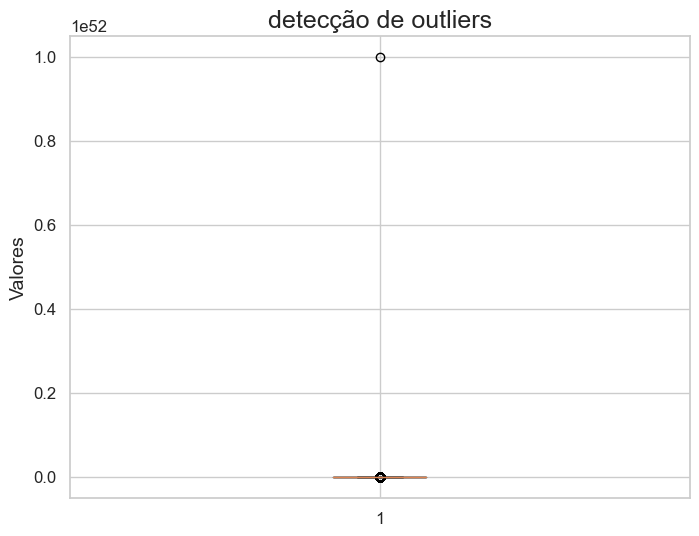

In [507]:
plt.figure(figsize=(8,6))
plt.boxplot(data['total_de_remuneração'])
plt.title('detecção de outliers')
plt.ylabel('Valores')
plt.show()

Como observado no gráfico, há um valor que se destaca dos demais. Irei removê-lo para evitar viés nos testes futuros.

In [508]:
data = data[data['total_de_remuneração'] < 4000000]

<Figure size 800x600 with 0 Axes>

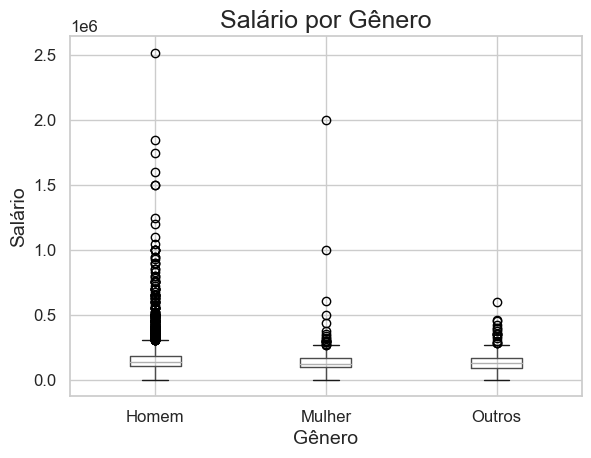

In [509]:
plt.figure(figsize=(8,6))
data.boxplot(column='total_de_remuneração', by='gênero')
plt.title('Salário por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Salário')
plt.suptitle('')  # Remover o título automático adicionado pelo Pandas
plt.show()

O gráfico acima mostra que há muitos salários que se distanciam da média, principalmente entre os homens. Também é possível observar que, em média, os homens recebem mais do que as mulheres e outros gêneros. Pelo menos nesta amostra, nos Estados Unidos, esse mercado ainda parece ser dominado predominantemente por homens.

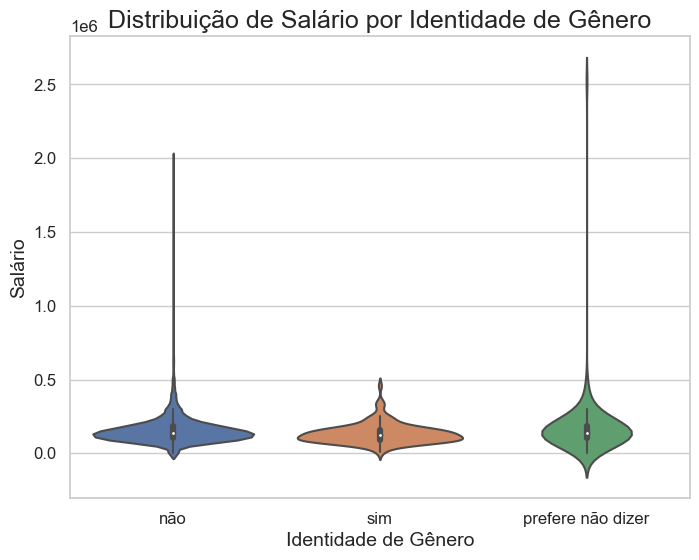

In [510]:
# Plotar gráfico de violino
plt.figure(figsize=(8,6))
sns.violinplot(x='transgênero', y='total_de_remuneração', data=data)
plt.title('Distribuição de Salário por Identidade de Gênero')
plt.xlabel('Identidade de Gênero')
plt.ylabel('Salário')
plt.show()

Pelo gráfico de violino, parece haver uma distribuição salarial semelhante entre pessoas trans e não trans. Isso é um bom sinal para a inclusão de pessoas trans no mercado de trabalho.

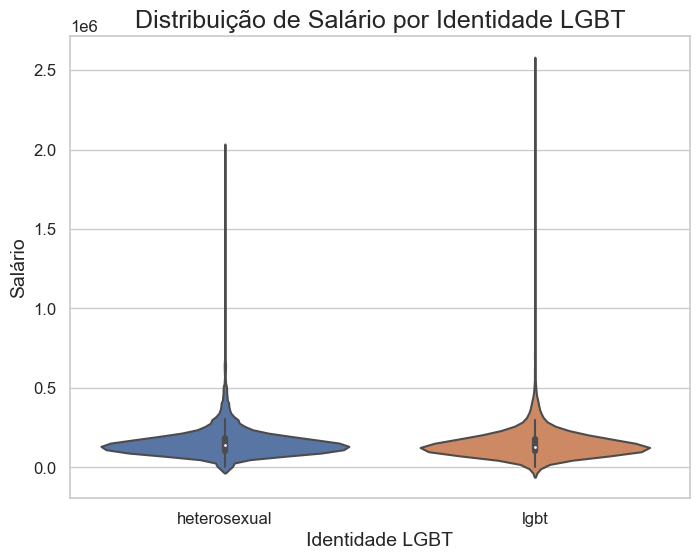

In [511]:
plt.figure(figsize=(8,6))
sns.violinplot(x='sexualidade', y='total_de_remuneração', data=data)
plt.title('Distribuição de Salário por Identidade LGBT')
plt.xlabel('Identidade LGBT')
plt.ylabel('Salário')
plt.show()

O mesmo para pessoas lgbts

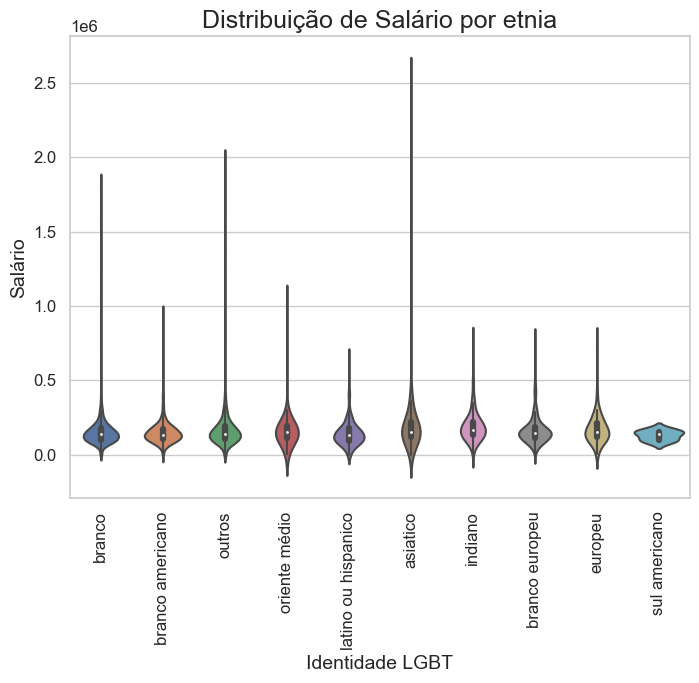

In [512]:
plt.figure(figsize=(8,6))
sns.violinplot(x='etnia', y='total_de_remuneração', data=data)
plt.title('Distribuição de Salário por etnia')
plt.xlabel('Identidade LGBT')
plt.ylabel('Salário')
plt.xticks(rotation=90)
plt.show()


Pelo gráfico, parece que a maior variação salarial é observada entre os asiáticos, enquanto os sul-americanos parecem estar concentrados em uma faixa salarial semelhante e não apresentam valores muito discrepantes. Isso pode indicar que os sul-americanos não ocupam uma posição de destaque nessa área nos Estados Unidos.

# Regressão

Agora vou ajustar as colunas para a regressão. Devido a problemas de multicolinearidade, vou definir como referência e remover as seguintes colunas dummy:

   Trabalho remoto: totalmente pessoal
    
   Nível de educação: Mestre
   
   Aprender a programar: Escola
   
   Tipo de desenvolvedor: outros
   
   Gênero: Homem
   
   Transgênero: não
   
   Sexualidade: heterossexual
   
   Etnia: branco americano

Para as variáveis contínuas:

   Anos de experiência profissional: manterei como está
   
   Idade: adicionarei uma coluna de idade ao quadrado, considerando que após certo ponto a idade pode afetar negativamente o salário devido à perda de habilidades.

Antes disso, irei verificar e corrigir os dtypes e, em seguida, analisar a correlação entre as colunas. Uma alta correlação entre duas colunas pode levar a um coeficiente enviesado e até mesmo a uma mudança de sinal no valor desse coeficiente.


In [513]:
print(data.dtypes)

trabalho_remoto           object
nível_de_educação         object
aprender_a_programar      object
anos_de_exp_prof          object
tipo_de_desenvolvedor     object
total_de_remuneração     float64
idade                    float64
gênero                    object
transgênero               object
sexualidade               object
etnia                     object
dtype: object


In [514]:
data['anos_de_exp_prof'] = data['anos_de_exp_prof'].astype(float)

In [515]:
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns).astype(int)

In [516]:
drop = ['trabalho_remoto_totalmente pessoal' , 'nível_de_educação_Mestre', 'aprender_a_programar_Escola', 'tipo_de_desenvolvedor_outros', 'gênero_Homem', 'transgênero_não', 'sexualidade_heterosexual', 'etnia_branco americano']

In [517]:
data = data.drop(drop,axis=1)

In [518]:
total_de_remuneração = data['total_de_remuneração']

In [519]:
data = data.drop('total_de_remuneração',axis = 1)

In [520]:
data['constante'] = 1
data['idade^2'] = data['idade']**2

In [521]:
def heatmap(x):
    fig1, ax1 = plt.subplots(figsize=(20,20))
    sns.set(font_scale=1.5)
    mask = np.triu(np.ones_like(x.corr(), dtype=bool))
    hm = sns.heatmap(x.corr(), mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm')
    plt.show()

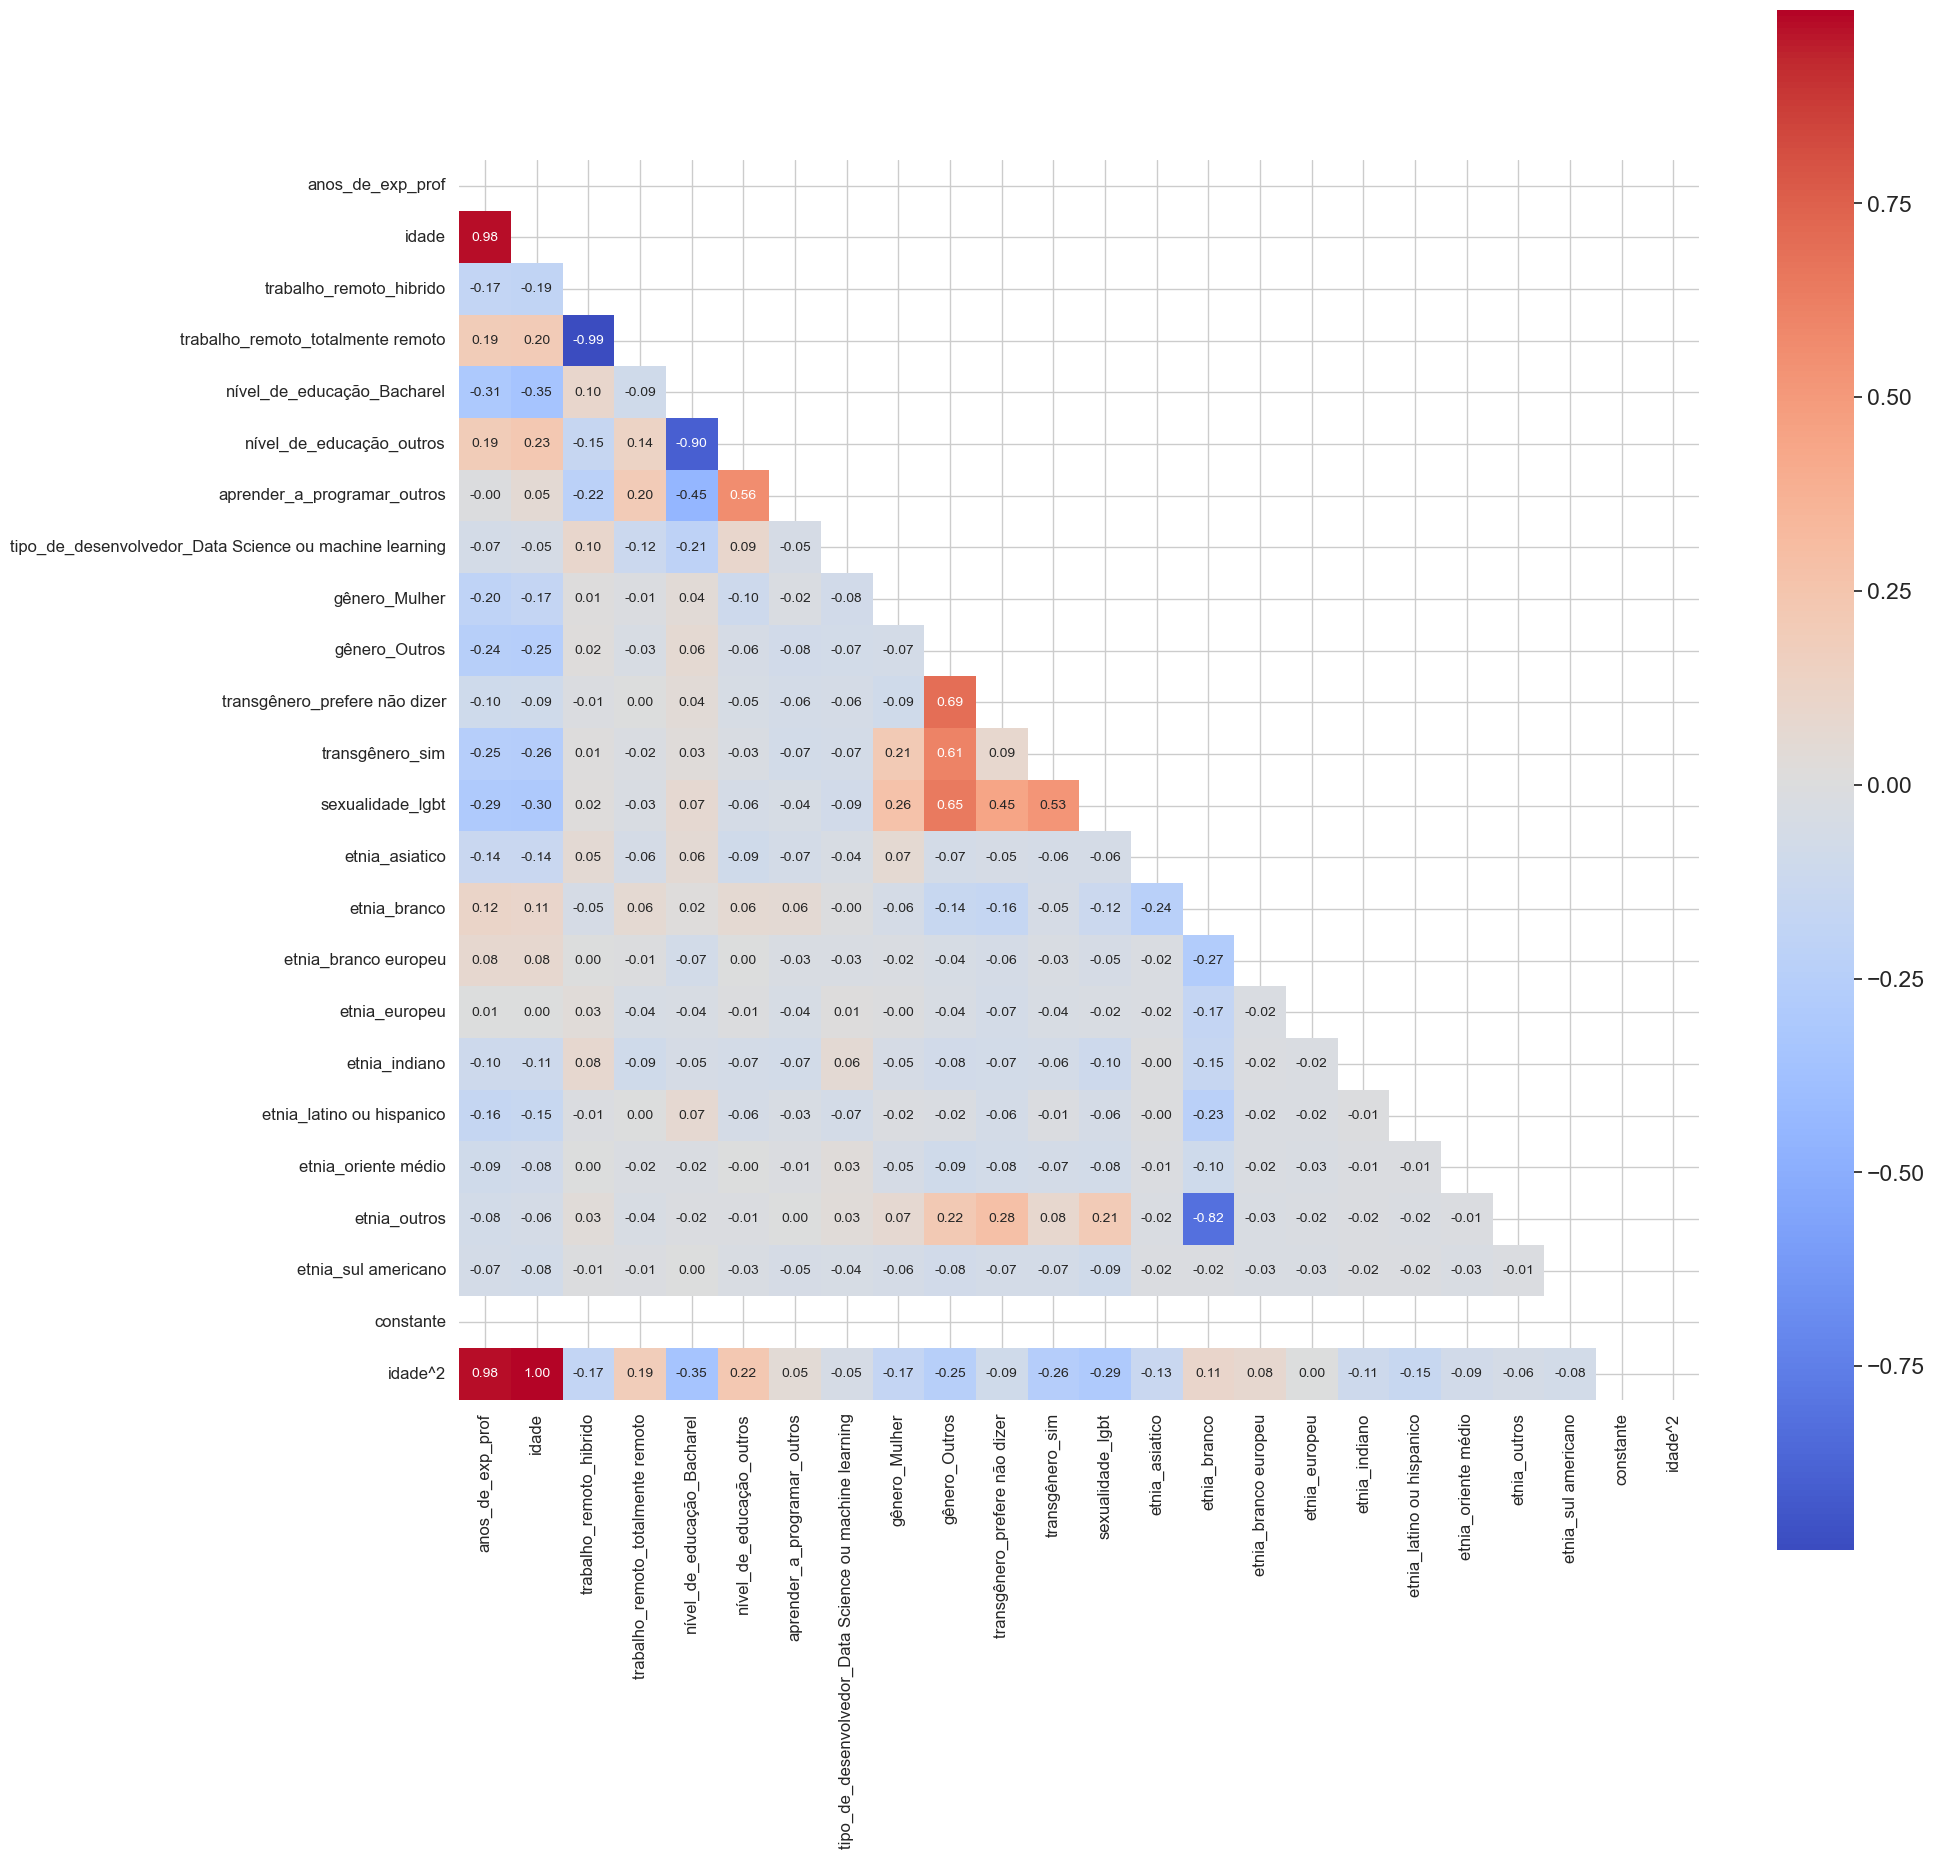

In [522]:
heatmap(data.corr())

As áreas em vermelho no gráfico acima (heatmap) indicam uma correlação mais forte entre as variáveis correspondentes, enquanto as áreas mais azuis sugerem uma correlação mais fraca.

A quantidade de anos de experiência demonstra uma alta correlação com a idade e a idade ao quadrado, o que é esperado.

A categoria de pessoas que aprenderam a programar fora da faculdade ou escola também apresenta uma correlação significativa com pessoas que têm uma educação diferente do ensino superior, o que é compreensível, já que essas pessoas, por não terem frequentado o ensino superior, podem ter aprendido a programar de outras formas.

A categoria de pessoas que não se identificam como homem ou mulher também está correlacionada de forma expressiva com pessoas LGBTs ou trans.

Devido à correlação quase perfeita entre anos de experiência, idade e idade ao quadrado, optarei por remover as colunas de idade e idade ao quadrado, mantendo apenas a de anos de experiência. As outras correlações, acredito, não terão um impacto tão significativo nos resultados da regressão.

In [523]:
data = data.drop(['idade' , 'idade^2'] , axis = 1) 

Finalmente, as colunas estão organizadas da seguinte forma:

In [524]:
for coluna in data.columns:
    
    if coluna in ['anos_de_exp_prof']:
        print(f'Variável {coluna}: Valores contínuos')
    else:
        print(f'Variável {coluna}: Dummy - assume os valores 0 ou 1')

Variável anos_de_exp_prof: Valores contínuos
Variável trabalho_remoto_hibrido: Dummy - assume os valores 0 ou 1
Variável trabalho_remoto_totalmente remoto: Dummy - assume os valores 0 ou 1
Variável nível_de_educação_Bacharel: Dummy - assume os valores 0 ou 1
Variável nível_de_educação_outros: Dummy - assume os valores 0 ou 1
Variável aprender_a_programar_outros: Dummy - assume os valores 0 ou 1
Variável tipo_de_desenvolvedor_Data Science ou machine learning: Dummy - assume os valores 0 ou 1
Variável gênero_Mulher: Dummy - assume os valores 0 ou 1
Variável gênero_Outros: Dummy - assume os valores 0 ou 1
Variável transgênero_prefere não dizer: Dummy - assume os valores 0 ou 1
Variável transgênero_sim: Dummy - assume os valores 0 ou 1
Variável sexualidade_lgbt: Dummy - assume os valores 0 ou 1
Variável etnia_asiatico: Dummy - assume os valores 0 ou 1
Variável etnia_branco: Dummy - assume os valores 0 ou 1
Variável etnia_branco europeu: Dummy - assume os valores 0 ou 1
Variável etnia_europ

# #Regressão:

In [525]:
modelo = sm.OLS(total_de_remuneração, data)

resultado = modelo.fit()

print(resultado.summary())

                             OLS Regression Results                             
Dep. Variable:     total_de_remuneração   R-squared:                       0.060
Model:                              OLS   Adj. R-squared:                  0.057
Method:                   Least Squares   F-statistic:                     22.86
Date:                  Thu, 01 Feb 2024   Prob (F-statistic):           1.84e-85
Time:                          23:16:46   Log-Likelihood:                -97784.
No. Observations:                  7540   AIC:                         1.956e+05
Df Residuals:                      7518   BIC:                         1.958e+05
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Os resultados da análise são os seguintes:

O coeficiente de determinação  R2 foi de 0.06, indicando um ajuste relativamente fraco das variáveis explicativas em relação à remuneração total.

Para os valores-p, foi considerado um nível de significância de 5%. Portanto, colunas com valores-p acima de 5% não foram consideradas.

Os coeficientes fornecidos referem-se às variáveis apresentadas anteriormente.

Interpretação dos resultados:

   Um indivíduo com bacharelado ganha, em média, $13.220 a menos do que alguém com mestrado.
    
   Mulheres ganham, em média, $15.060 a menos do que homens.
    
   Pessoas que não se identificam como homens ou mulheres ganham, em média, $19.080 a menos do que homens.
    
   Asiáticos ganham, em média, $51.830 a mais do que brancos nos Estados Unidos.
    
   Pessoas trans não ganham menos do que pessoas não trans, e pessoas LGBTs não ganham menos do que pessoas não LGBTs.